In [1]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

the variable descriptions are as follows:

- Age: Age of the patient in years

- Sex: Sex of the patient- male or female

- BP: Blood Pressure of patient-high, low, or normal

- Cholesterol-Cholesterol level of the patient- normal or high

- Na-to_K: Sodium to Potassium ratio in patient's blood

- Drug: The drug type that the patient was prescirbed- drugA,drugB,drugC,drugX or drugY

In [2]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [5]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [6]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

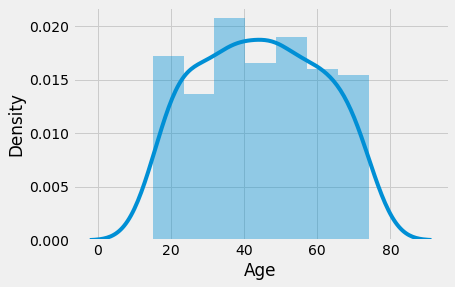

In [7]:
sns.distplot(df['Age'])

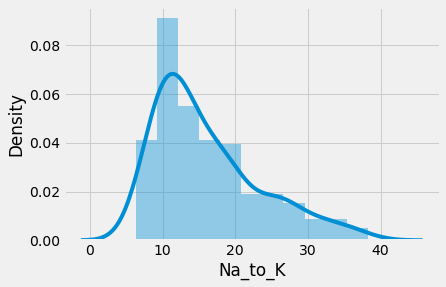

In [8]:
sns.distplot(df['Na_to_K'])

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Age groups:

- under 30s
- 30-40
- 40-50
- 50-60
- Over 60s

Sodium to Potassium ratios:

- 5-10
- 10-15
- 15-20
- 20-25
- 25-30
- 30+

In [10]:
age_groups = []
for i in df['Age']:
    if i <= 30:
        age_groups.append('0-30')
    if i > 30 and i <= 40:
        age_groups.append('30-40')
    if i > 40 and i <= 50:
        age_groups.append('40-50')
    if i > 50 and i <= 60:
        age_groups.append('50-60')
    if i > 60:
        age_groups.append('60+')

df['AgeGroup'] = age_groups

In [11]:
na_to_k_groups = []
for i in df["Na_to_K"]:
    if i <= 10:
        na_to_k_groups.append('5-10')
    if i > 10 and i <= 15:
        na_to_k_groups.append('10-15')
    if i > 15 and i <= 20:
        na_to_k_groups.append('15-20')
    if i > 20 and i <= 25:
        na_to_k_groups.append('20-25')
    if i > 25 and i <= 30:
        na_to_k_groups.append('25-30')
    if i > 30:
        na_to_k_groups.append('30+')

df['Na_to_K_groups'] = na_to_k_groups

In [12]:
df = df[['AgeGroup','Sex','BP','Cholesterol','Na_to_K_groups','Drug']]
df.head()

,AgeGroup,Sex,BP,Cholesterol,Na_to_K_groups,Drug
0,0-30,F,HIGH,HIGH,25-30,DrugY
1,40-50,M,LOW,HIGH,10-15,drugC
2,40-50,M,LOW,HIGH,10-15,drugC
3,0-30,F,NORMAL,HIGH,5-10,drugX
4,60+,F,LOW,HIGH,15-20,DrugY


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AgeGroup        200 non-null    object
 1   Sex             200 non-null    object
 2   BP              200 non-null    object
 3   Cholesterol     200 non-null    object
 4   Na_to_K_groups  200 non-null    object
 5   Drug            200 non-null    object
dtypes: object(6)
memory usage: 9.5+ KB


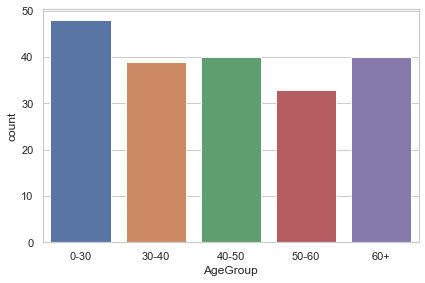

In [14]:
sns.set_theme(style="whitegrid")
sns.countplot(x="AgeGroup", data=df, order=['0-30', '30-40', '40-50', '50-60', '60+'])

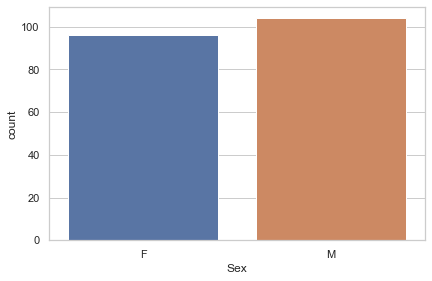

In [15]:
sns.countplot(x='Sex', data=df, order=['F', 'M'])

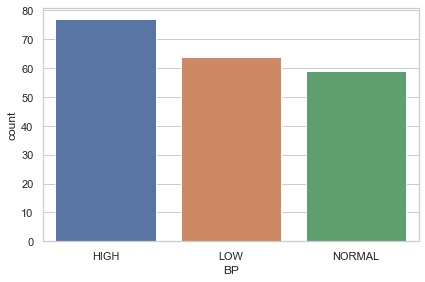

In [16]:
sns.countplot(x='BP', data=df)

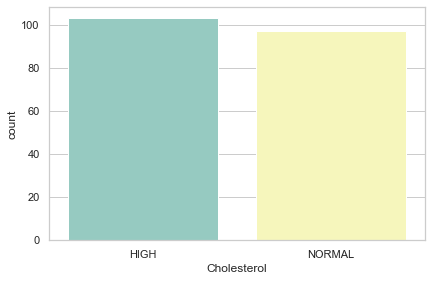

In [17]:
sns.countplot(x='Cholesterol', data=df, palette="Set3")

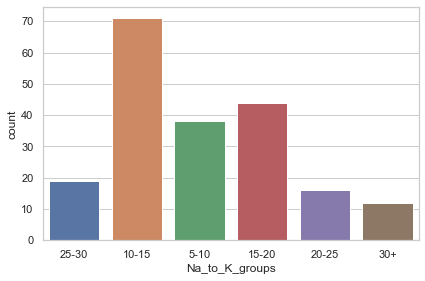

In [18]:
sns.countplot(x='Na_to_K_groups', data=df)

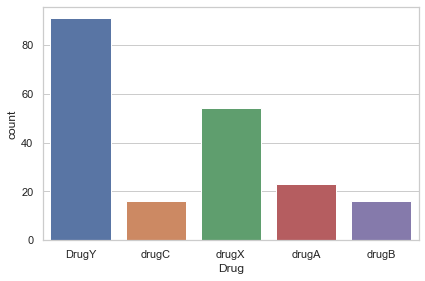

In [19]:
sns.countplot(x='Drug', data=df)

Label Drug disini memperlihatkan bahwa data tidak seimbang dari 5 jenis drug ini, untuk itu dalam proses klasifikasi ini perlu untuk dimanipulasi, salah satunya dengan SMOTE(Synthetic Minority Oversampling Technique), metode SMOTE ini tentunya akan menyebabkan DrugC, DrugX, DrugA, dan DrugB akan mempunyai jumlah yang seimbang. Hal ini tentunya akan mengurangi overfitting yang terjadi dalam pengolahan model nanti

In [20]:
X = df.drop(columns=('Drug'))
y = df['Drug']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [22]:
# Data diencode dengan get dummies
X_train = pd.get_dummies(pd.DataFrame(X_train))
X_test = pd.get_dummies(pd.DataFrame(X_test))

In [23]:
# Metode SMOTE ini akan diaplikasikan di training set
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

[Text(0.5, 0, 'Drug')]

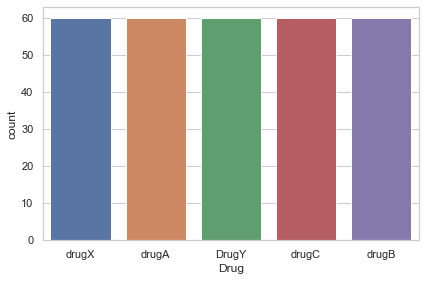

In [24]:
ax = sns.countplot(x=y_train, data=df)
ax.set(xlabel='Drug')

## XGBOOST

In [25]:
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [26]:
xgb_fit = XGBRFClassifier(random_state=42).fit(X_train, y_train)

pred_xgb = xgb_fit.predict(X_test)

[12:18:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        31
       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        15

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



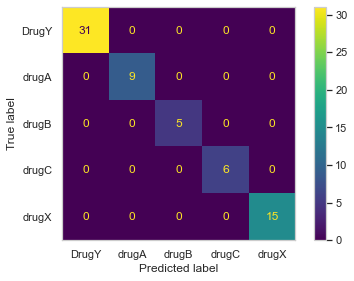

In [27]:
print(classification_report(y_test, pred_xgb))

plot_confusion_matrix(estimator=xgb_fit, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [28]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xgb_fit.feature_importances_}).sort_values(by ='Score', 
                                                                                                   ascending = False)
features_importances.head()

,Features,Score
9,BP_NORMAL,0.137125
8,BP_LOW,0.121523
4,AgeGroup_60+,0.079766
14,Na_to_K_groups_20-25,0.079587
7,BP_HIGH,0.073024


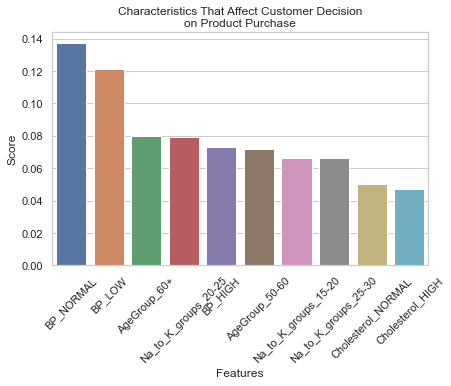

In [29]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [30]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
# models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()

In [32]:
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train, y_train)

In [33]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

## Random Forest Classifier

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.98        31
       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         5
       drugC       1.00      0.83      0.91         6
       drugX       1.00      1.00      1.00        15

    accuracy                           0.98        66
   macro avg       0.99      0.97      0.98        66
weighted avg       0.99      0.98      0.98        66



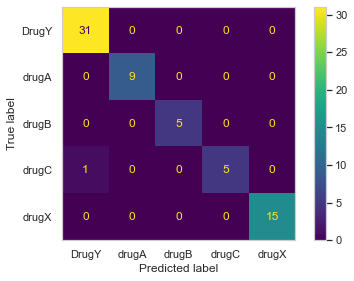

In [34]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [35]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
7,BP_HIGH,0.139223
8,BP_LOW,0.107570
12,Na_to_K_groups_10-15,0.083496
9,BP_NORMAL,0.079423
3,AgeGroup_50-60,0.065898


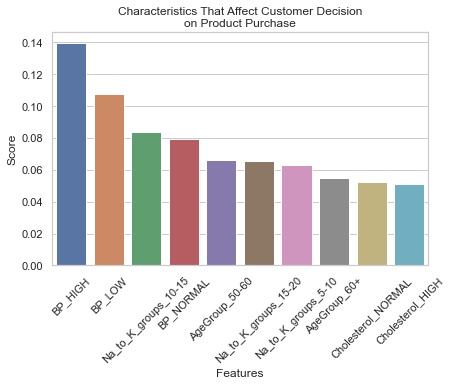

In [36]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## SVM

              precision    recall  f1-score   support

       DrugY       0.47      1.00      0.64        31
       drugA       0.00      0.00      0.00         9
       drugB       0.00      0.00      0.00         5
       drugC       0.00      0.00      0.00         6
       drugX       0.00      0.00      0.00        15

    accuracy                           0.47        66
   macro avg       0.09      0.20      0.13        66
weighted avg       0.22      0.47      0.30        66



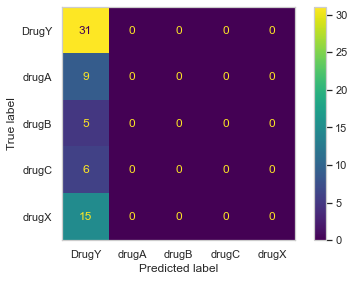

In [37]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

## Logistic Regression

              precision    recall  f1-score   support

       DrugY       1.00      0.94      0.97        31
       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         5
       drugC       0.75      1.00      0.86         6
       drugX       1.00      1.00      1.00        15

    accuracy                           0.97        66
   macro avg       0.95      0.99      0.96        66
weighted avg       0.98      0.97      0.97        66



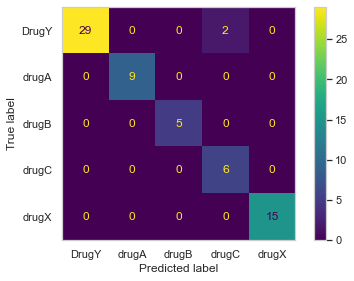

In [38]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

## Decision Tree Classifier

              precision    recall  f1-score   support

       DrugY       0.97      0.97      0.97        31
       drugA       1.00      1.00      1.00         9
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         6
       drugX       0.94      1.00      0.97        15

    accuracy                           0.97        66
   macro avg       0.98      0.95      0.96        66
weighted avg       0.97      0.97      0.97        66



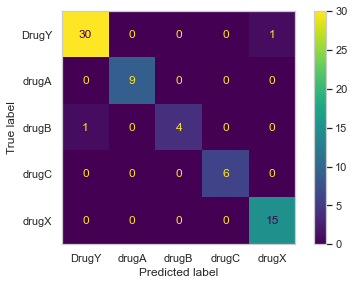

In [39]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [40]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 'Score':dt.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
7,BP_HIGH,0.201923
4,AgeGroup_60+,0.128548
10,Cholesterol_HIGH,0.101938
13,Na_to_K_groups_15-20,0.100224
8,BP_LOW,0.098648


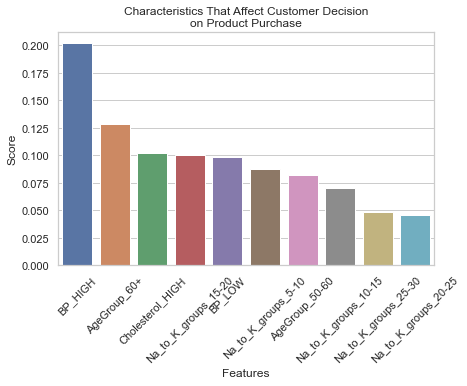

In [41]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## KNN

              precision    recall  f1-score   support

       DrugY       0.96      0.77      0.86        31
       drugA       0.75      0.67      0.71         9
       drugB       0.43      0.60      0.50         5
       drugC       0.60      1.00      0.75         6
       drugX       0.81      0.87      0.84        15

    accuracy                           0.79        66
   macro avg       0.71      0.78      0.73        66
weighted avg       0.82      0.79      0.80        66



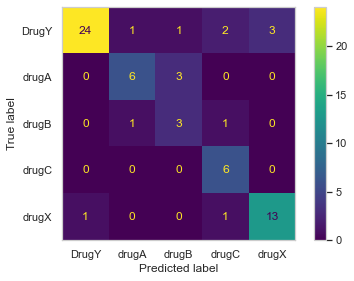

In [42]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

## Naive Bayes

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        31
       drugA       1.00      1.00      1.00         9
       drugB       1.00      1.00      1.00         5
       drugC       1.00      0.83      0.91         6
       drugX       0.94      1.00      0.97        15

    accuracy                           0.98        66
   macro avg       0.99      0.97      0.98        66
weighted avg       0.99      0.98      0.98        66



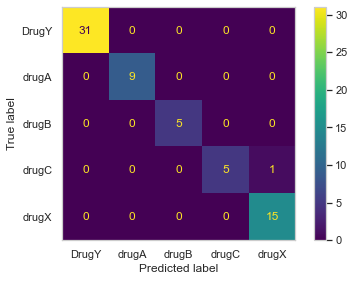

In [43]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

## Kesimpulan
Dari hasil beberapa model, yang terbaik bisa diambil adalah
- XGBOOST
- Naive Bayes